In [4]:
input_file = '../graph/bitcoin-sorted.edgelist'

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import graphviz as gv

mpl.rcParams['figure.figsize'] = [18.5, 10.5]

In [6]:
df = pd.read_csv(input_file, sep=' ', header=0)
df.columns = ['X', 'Y']
num_samples = df['X'].size
num_samples

35590

In [7]:
# Group the elements by count
counts = df.groupby('X').count()
counts.size

4814

In [8]:
np.mean(counts)

Y    7.39302
dtype: float64

In [9]:
np.median(counts)

2.0

In [10]:
df.index.values

array([    0,     1,     2, ..., 35587, 35588, 35589])

Plot distribution of node degrees (number of neighbors per node)

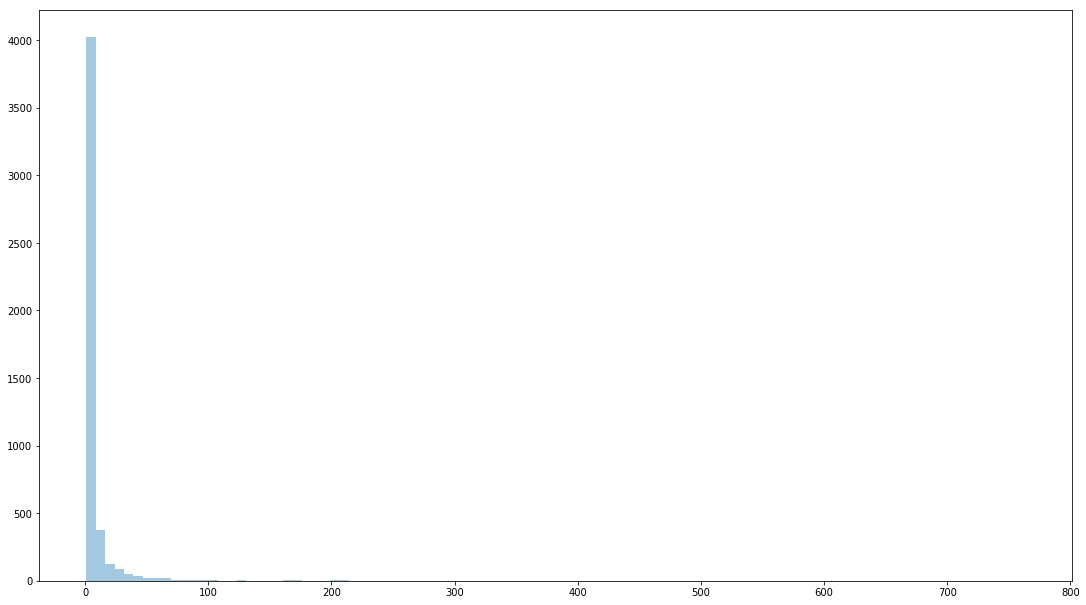

In [11]:
sns.distplot(counts, kde=False, bins=100)

In [12]:
percentiles = pd.DataFrame(counts.loc[:, 'Y'] / num_samples)

In [13]:
cumsum = percentiles.cumsum()

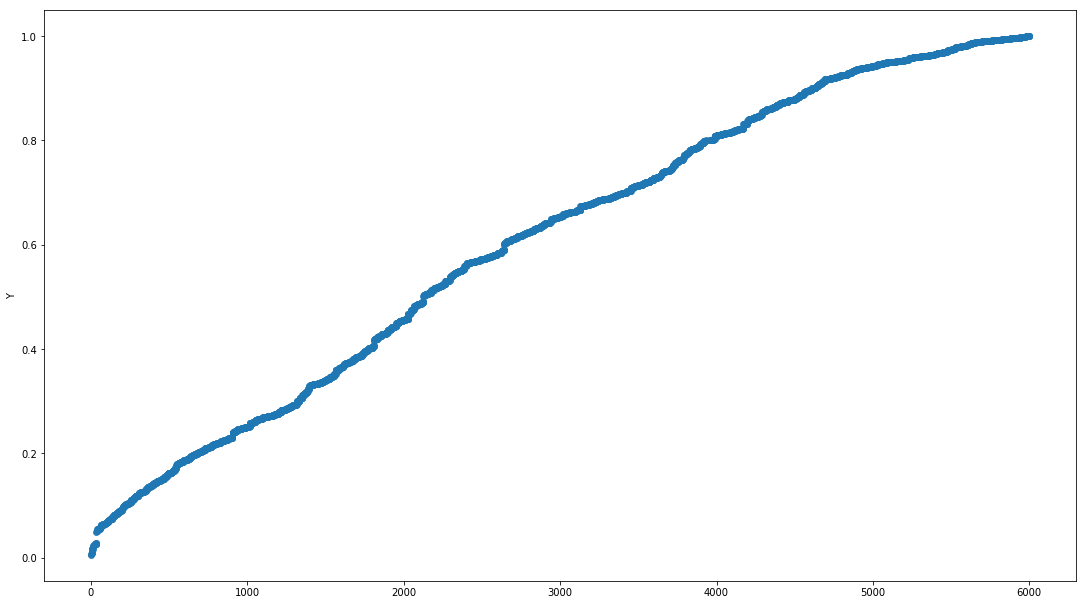

In [14]:
sns.regplot(cumsum.index.values, cumsum['Y'], fit_reg=False)

In [23]:
# Load embeddings
df_emb_10 = pd.read_csv('../emb/bitcoin-2dims-10walks.emb', sep=' ')
df_emb_20 = pd.read_csv('../emb/bitcoin-2dims-20walks.emb', sep=' ')
df_emb_30 = pd.read_csv('../emb/bitcoin-2dims-30walks.emb', sep=' ')
df_emb_40 = pd.read_csv('../emb/bitcoin-2dims-40walks.emb', sep=' ')
df_emb_50 = pd.read_csv('../emb/bitcoin-2dims-50walks.emb', sep=' ')
df_emb_60 = pd.read_csv('../emb/bitcoin-2dims-60walks.emb', sep=' ')
df_emb_70 = pd.read_csv('../emb/bitcoin-2dims-70walks.emb', sep=' ')
df_emb.columns = ['X', 'Y']
df_emb

,X,Y
79,-1.398606,-2.129186
65,-1.382631,-2.138586
170,-1.475846,-2.362267
103,-1.489311,-2.391592
86,-1.568889,-2.374268
168,-1.549496,-2.348598
140,-1.541934,-2.350356
83,-1.557308,-2.358325
16,-1.505369,-2.311906
116,-1.582999,-2.392410


In [24]:
# Rename to common naming conventions
df_grouped = df.groupby('X').count()
df_grouped.index.rename('Id', inplace=True)
df_grouped.columns = ['Count']

In [25]:
# Rename and join
df_emb.index.rename('Id', inplace=True)
df_joined = df_emb.join(df_grouped)
df_joined['Count'].fillna(0, inplace=True)
df_joined.sort_values(by=['Count'])

,X,Y,Count
Id,,,
756,2.278972,-1.064705,0.0
5901,-1.444229,-2.181747,0.0
5170,-1.425978,-2.179339,0.0
5561,-1.537808,-2.311192,0.0
5757,-1.571198,-2.346688,0.0
5281,-1.402785,-2.138028,0.0
4792,3.471052,-1.642168,0.0
5401,-1.415602,-2.155980,0.0
5112,-1.500035,-2.264728,0.0


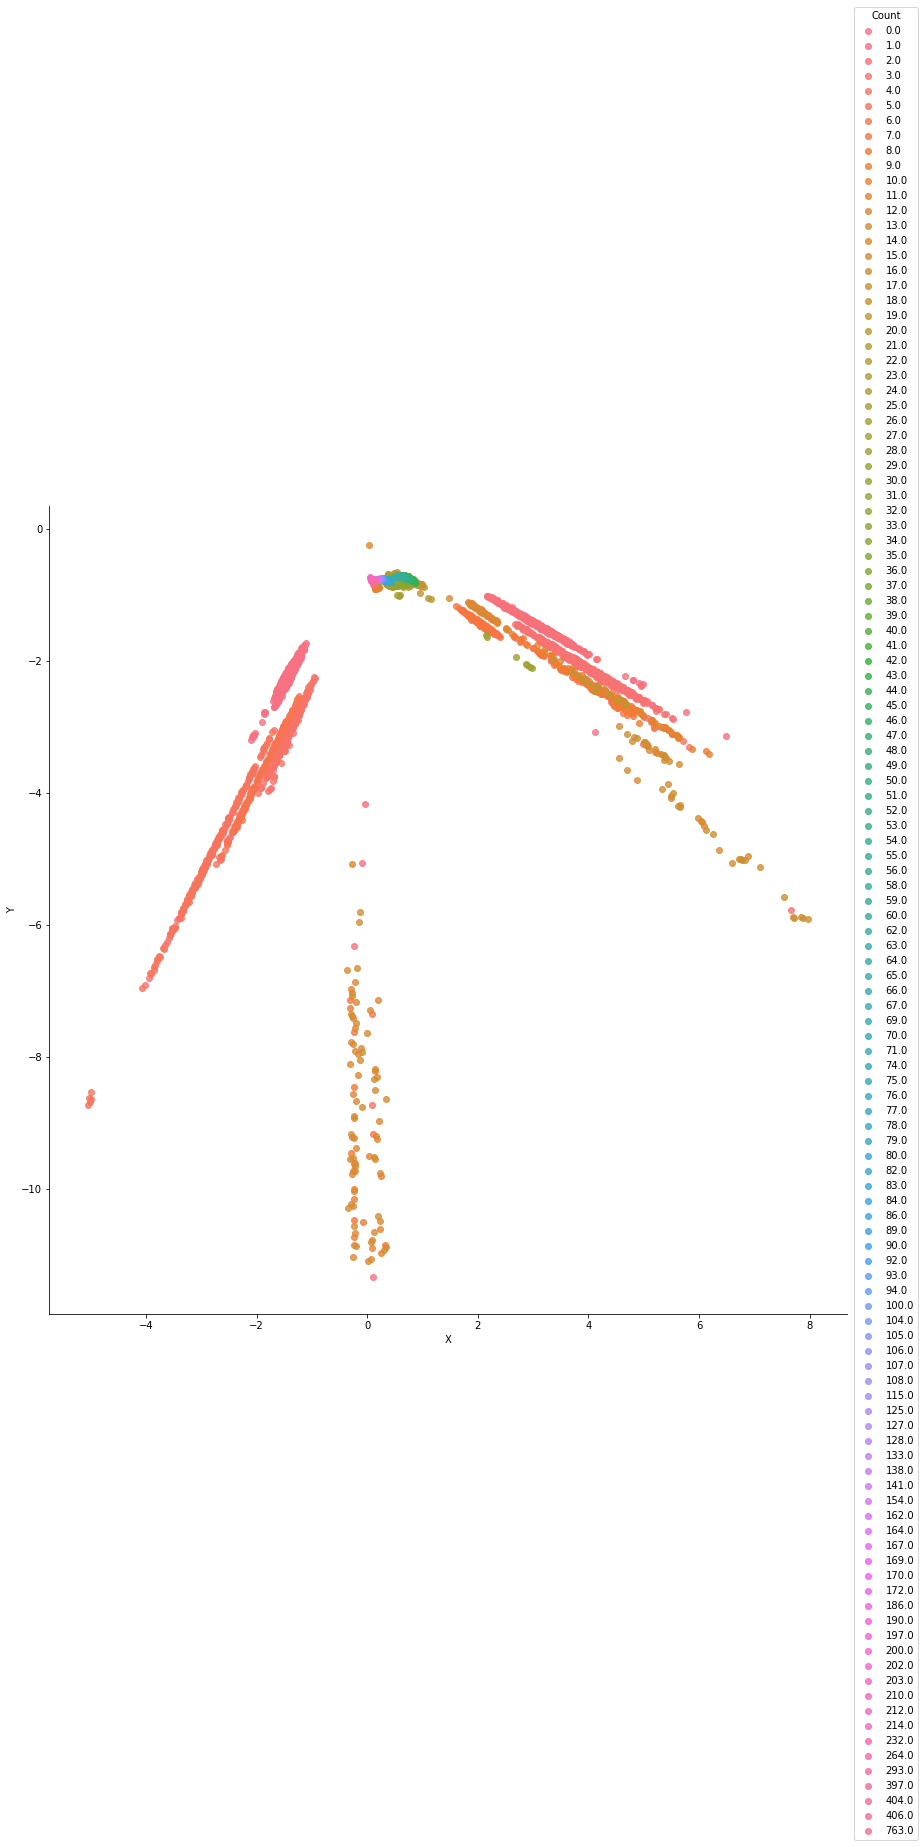

In [26]:
sns.lmplot(data=df_joined, x='X', y='Y', hue='Count', fit_reg=False, size=12, aspect=1)